# Lab One : Visualization and Data Pre-processing

### Group 3 - Members:

_Apurv Mittal_<br>
_Seemant Srivastava_<br>
_Ravi Sivaraman_<br>
_Tai Chowdhury_<br>


## 1. Business Understanding

The weather prediction has been of interest for ages as it effects all of us in our day to day life in many ways. Ability to predict with high accuracy, if its going to rain today or tomorrow and how much can help us plan our day better and we can take precautions if needed.

We have acquired the Australian Weather dataset from Kaggle portal. It contains 10 years of weather data collected from many locations across Australia. These are daily weather observations. There are 145,459 observations with 23 attributes. These attributes describes temperatures, wind, cloud, pressure, and humidity conditions both. There numeric data are broken down into morning (am) and afternoon (pm). 

This dataset can be useful for scientific weather reporting and analysis projects for the respective country's regions. These projects can provide solutions to weather prediction problems. For our project, we have chosen RainTomorrow (categorical) and Rainfall (continuous) as predictor variables. `RainTomorrow` is a categorical attribute which indicates whether it is going to rain tomorrow - yes or no. `Rainfall` is a continuous attribute that measures amount of rainfall each of the particular locations have received (in mm). Using our models, we will be able to design an algorithm where the bureau can help to predict rainfall for different regions in Australia.

We will measure the accuracy and effectiveness of our model for categorical variable `RainTomorrow` by using 10-fold cross validation against the confusion matrix measurements like: sensitivity, specificity and accuracy. We can use Logistic Regression, Random Forest and other parametric and non-parametric models to measure the effectiveness and determine the most appropriate model for prediction.

Similarly, We will predict the `Rainfall` (in mm) which is a continous variable using a regression model. We will its effectiveness by using 10-fold cross validation against RMSE (Root Mean Square Error).

Once the machine learning model is built we can test and measure its validity in other geographies and may not just confine to Australia.



Source: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

## 2. Data Meaning Type

In [1]:
# Import the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from scipy import stats


In [2]:
# Read the Australia weather data
df = pd.read_csv("weatherAUS.csv")

In [3]:
#  View the top rows of the data imported
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,State
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,New South Wales
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,New South Wales
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,New South Wales
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,New South Wales
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,New South Wales


Data imported successfully. We can view all the variables and the top rows above. Its visible that there are several null values and we may need to do decide what should we do to accomodate the missing information. As we go along, we will talk abpout the approach we have adopted to handle the sceanrios with missing information.

In [4]:
# A quick look at the variables and the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

## 3. Data Quality

In [5]:
# summarize the dataset with statistical summary of numeric "float" variables

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


Ran summary statistics on the imported dataset. We can see the various satistical summary on the "float" (numeric) variables. We see some large variations in the dataset like Evaportaion ranges from 0 to 145, wind gust varies from 6 kmph to 135 kmph. Which are huge variation but are they invalid data or genuine outliers? We will investigate that in the later sections.

In [6]:
# Count of data types

df.dtypes.value_counts()

float64    16
object      8
dtype: int64

In [7]:
# Check for duplicates
df.duplicated().sum()

0

We ran a duplicate check and we identify there are no duplicates in our dataset which means we don't need to take any action to reduce the impact of duplicate data.

In [8]:
# Check for null values

df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
State             3009
dtype: int64

We can see there are bunch of missing values in our dataset across the variables. Some variables stand out in terms of number of missing information like `Evaporation` and `Sunshine`. We will continue to investigage further.

In [9]:
# Number of total records
len(df)

145460

We have total of 145,460 records. This includes the missing data as well. This calculation is useful in undetstanding the magnitude of missing data. What is the percentage of data is actually missing? We find out below:

In [10]:
# List the percentage of missing information

(df.isnull().sum()/len(df)*100).sort_values(ascending=True)

Date              0.000000
Location          0.000000
MaxTemp           0.866905
MinTemp           1.020899
Temp9am           1.214767
WindSpeed9am      1.214767
Humidity9am       1.824557
State             2.068610
WindSpeed3pm      2.105046
RainToday         2.241853
Rainfall          2.241853
RainTomorrow      2.245978
Temp3pm           2.481094
WindDir3pm        2.906641
Humidity3pm       3.098446
WindGustSpeed     7.055548
WindGustDir       7.098859
WindDir9am        7.263853
Pressure3pm      10.331363
Pressure9am      10.356799
Cloud9am         38.421559
Cloud3pm         40.807095
Evaporation      43.166506
Sunshine         48.009762
dtype: float64

We listed the missing data in ascending order to understand what percentage of data is missing. This will help us in determining the most appropriate action we can take to handle the missing information. 

As seen above there are 6 variables which has more than 10% of missing data. `Sunshine`, `Evaporation`, `Cloud at 3 pm`, `Cloud at 9 am` has the most missing data in that order. With more that 38% of missing information, we have to decide how to impute the missing information. If we delete the missing rows, we will lose a lot of important and pertinent information which is not desirable. We need to decide a way to impute the information.

However, before we impute any information, we also notice that `RainToday` and `Rain Tomorrow` also has about equal amount of missing data but the percentage is not very high. Its under 2.5%. And since `Rain Tomorrow` is one of our response variables, we don't want to impute information there based on certain assumption as it may impact the overall predictability of the data and our models may not turn out to be very successful.

With that in mind, we first start with deleting the rows with missing `Rain Today` and `Rain Tomorrow` variable as shown below.

In [11]:
# Removing records which are blank for Rain today and Rain tomorrow

df.dropna(subset = ["RainToday"], inplace=True)
df.dropna(subset = ["RainTomorrow"], inplace=True)

# REFERENCE: https://www.kite.com/python/answers/how-to-drop-empty-rows-from-a-pandas-dataframe-in-python

As explained above, we decided to drop the records with missing (null) data for `RainToday` and `RainTomorrow` variables which is under 2.5% of the total dataset.

In [12]:
# Check the null values again
(df.isnull().sum()/len(df)*100).sort_values(ascending=True)

Date              0.000000
Location          0.000000
Rainfall          0.000000
RainToday         0.000000
RainTomorrow      0.000000
MaxTemp           0.218060
MinTemp           0.332417
Temp9am           0.465952
WindSpeed9am      0.749359
Humidity9am       1.077514
WindSpeed3pm      1.797751
Temp3pm           1.863808
State             2.043513
Humidity3pm       2.486735
WindDir3pm        2.606775
WindGustSpeed     6.467216
WindGustDir       6.508413
WindDir9am        6.861429
Pressure9am       9.761555
Pressure3pm       9.780022
Cloud9am         37.379161
Cloud3pm         39.843167
Evaporation      42.400222
Sunshine         47.451114
dtype: float64

A quick look at the percentage of missing data after deletion of the missing rows for RainToday and RainTomorrow confirms the data got deleted successfully.


##### Reference: https://medium.com/analytics-vidhya/python-finding-missing-values-in-a-data-frame-3030aaf0e4fd

In [13]:
# Seperate the data into categorical and numeric

df_num = df.columns[df.dtypes == 'float64']
df_cat=df.columns[df.dtypes == 'object']
print("Numeric Variables:", df_num)
print("Categorical Variables:", df_cat)

Numeric Variables: Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')
Categorical Variables: Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow', 'State'],
      dtype='object')


Seperated the dataset into numeric and categorical variables. This will be helpful with further analysis including data imputation, dimensionality reduction (PCA) analysis, grouping etc.

In [14]:
df[df_num].groupby([df['RainToday'],df['RainTomorrow']]).mean()

MinTemp    MaxTemp   Rainfall  Evaporation  \
RainToday RainTomorrow                                                 
No        No            11.818967  24.422043   0.063760     6.032209   
          Yes           12.956982  22.360206   0.139003     5.088293   
Yes       No            12.324060  20.642048   7.906851     4.081266   
          Yes           13.469845  19.688553  12.970597     3.877320   

                        Sunshine  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
RainToday RainTomorrow                                                        
No        No            8.890686      37.821107     13.317527     18.022658   
          Yes           5.062517      44.669880     14.539171     19.550031   
Yes       No            6.678808      40.884074     14.924111     19.339026   
          Yes           3.765870      47.470654     16.563479     20.649129   

                        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
RainToday RainTomorrow                                                       
No        No              64.082293    44.362724  1018.954556  1016.230809   
          Yes             71.589227    63.305238  1015.153728  1012.459066   
Yes       No              77.932642    58.221810  1016.621577  1015.476598   
          Yes             85.460455    75.440652  1013.446272  1012.015427   

                        Cloud9am  Cloud3pm    Temp9am    Temp3pm  
RainToday RainTomorrow                                            
No        No            3.635105  3.684394  17.334427  22.974297  
          Yes           5.562970  6.138312  17.260482  20.276654  
Yes       No            5.436373  5.118582  15.647827  19.267326  
          Yes           6.681342  6.624841  16.010420  17.930996

Since the Rainfall is the interest of this study. We decided to check the mean for all numeric variables based upon the value for `RainToday` and `RainTomorrow` variables. We belive that Rain is a very significant weather event and lots of other events and variations in the weather happen on the account of the Rain, its only appropriate to check how the mean varies for the variables depending upon it rains or not.

As expected, we notice the variation is significant among the variables depending upon the rain event.Like `Humidity` varies significatly (particluarly in the evening) as it rains today or tomorrow versus no rain at all. Similarly cloud cover also sees a significant variation.

We will closely analyze `Evaporation`, `Sunshine`, `Cloud9am`, `Cloud3pm` as these variables has highest number of missing information. We need to determine if its safe to impute the missing information with the mean values for these variables or should be take a different approach.

##### REFERENCE: https://stackoverflow.com/questions/43321455/pandas-count-null-values-in-a-groupby-function/43322220

In [15]:
# Number of null for Evaporation by the RainToday And Rain Tomorrow
df_E = df.Evaporation.isnull().groupby([df['RainToday'],df['RainTomorrow']]).sum()
df_E_mean = df.Evaporation.groupby([df['RainToday'],df['RainTomorrow']]).mean()
print('Number of Nulls in Evaporation grouped by Rain Today and Rain Tomorrow:\n',df_E)
print('\nMean of Evaporation grouped by Rain Today and Rain Tomorrow:\n',df_E_mean)

print('\nOverall Mean of Evaporation:\n',df.Evaporation.mean())

Number of Nulls in Evaporation grouped by Rain Today and Tomorrow:
 RainToday  RainTomorrow
No         No              38964
           Yes              7071
Yes        No               7250
           Yes              6409
Name: Evaporation, dtype: int64

Mean of Evaporation grouped by Rain Today and Tomorrow:
 RainToday  RainTomorrow
No         No              6.032209
           Yes             5.088293
Yes        No              4.081266
           Yes             3.877320
Name: Evaporation, dtype: float64

Overall Mean of Evaporation:
 5.472515506887154


The `Evaporation` has most of its missing values for the days it doesn't rain, which is both `RainToday` and `RainTomorrow` are No. For all other days the number of missing records are comparable.

The average `Evaporation` on the days it doesn't rain i.e. both `RainToday` and `RainTomorrow` are "No" is 6.03 while the average `Evaporation` on the days it rains both Today and Tomorrow is 3.87, which is a variation of more than `55%`.

Based on the above data, its not appropriate to impute a mean value for every missing record of `Evaporation`. We will continue to investigate further.

In [16]:
# Number of null for Sunshine by the RainToday And Rain Tomorrow
df_S = df.Sunshine.isnull().groupby([df['RainToday'],df['RainTomorrow']]).sum()
df_S_mean = df.Sunshine.groupby([df['RainToday'],df['RainTomorrow']]).mean()
print('Number of Nulls in Sunshine grouped by Rain Today and Rain Tomorrow:\n',df_S, '\n')
print('\nMean of Sunshine grouped by Rain Today and Rain Tomorrow:\n',df_S_mean)
print('\nOverall Mean of Sunshine:\n',df.Sunshine.mean())

Number of Nulls in Sunshine grouped by Rain Today and Tomorrow:
 RainToday  RainTomorrow
No         No              44198
           Yes              7848
Yes        No               7982
           Yes              6777
Name: Sunshine, dtype: int64 


Mean of Sunshine grouped by Rain Today and Tomorrow:
 RainToday  RainTomorrow
No         No              8.890686
           Yes             5.062517
Yes        No              6.678808
           Yes             3.765870
Name: Sunshine, dtype: float64

Overall Mean of Sunshine:
 7.630539861047281


Similar to Evaporation, we will check the variation in the `Sunshine`. The `Sunshine` has most of its missing values for the days it does not rain, which is both `RainToday` and `RainTomorrow` are No. For all other days the number of missing records are comparable.

The average `Sunshine` on the days it does not rain i.e. both `RainToday` and `RainTomorrow` are "No" is 8.89 while the average `Sunshine` on the days it rains both Today and Tomorrow is 3.76, which is a variation of more than `103%`.

Based on the above data, its not appropriate to impute a mean value for every missing record of `Sunshine`as the overall mean is 7.63 which is way higher than the mean for the days when it rains. We will continue to investigate further for other important variables.

In [17]:
# Number of null for Cloud 3 PM by the RainToday And Rain Tomorrow

df_C3 = df.Cloud3pm.isnull().groupby([df['RainToday'],df['RainTomorrow']]).sum()
df_C3_mean = df.Cloud3pm.groupby([df['RainToday'],df['RainTomorrow']]).mean()
print('Number of Nulls in Cloud at 3 PM grouped by Rain Today and Rain Tomorrow:\n',df_C3, '\n')
print('\nMean of Cloud at 3 PM grouped by Rain Today and Rain Tomorrow:\n',df_C3_mean)
print('\nOverall Mean of Cloud at 3 PM:\n',df.Cloud3pm.mean())

Number of Nulls in Cloud at 3 PM grouped by Rain Today and Tomorrow:
 RainToday  RainTomorrow
No         No              38705
           Yes              6012
Yes        No               6224
           Yes              5153
Name: Cloud3pm, dtype: int64 


Mean of Cloud at 3 PM grouped by Rain Today and Tomorrow:
 RainToday  RainTomorrow
No         No              3.684394
           Yes             6.138312
Yes        No              5.118582
           Yes             6.624841
Name: Cloud3pm, dtype: float64

Overall Mean of Cloud at 3 PM:
 4.499250233195188


Similar to `Evaporation` and `Sunshine` the missing data of `Cloud3pm` (Clouds at 3 pm) heavily depends upon if it rains today and/or tomorrow. As expected the cound cover is lot more on the days it rains while much lesser on the days it doens't rain.

In this case also, the missing data is mostly on the days it doesn't rain and the average varies significantly.

In [18]:
# Number of null for Cloud 9 AM by the RainToday And Rain Tomorrow
df_C9 = df.Cloud9am.isnull().groupby([df['RainToday'],df['RainTomorrow']]).sum()
df_C9_mean = df.Cloud9am.groupby([df['RainToday'],df['RainTomorrow']]).mean()
print('Number of Nulls in Cloud at 9 AM grouped by Rain Today and Rain Tomorrow:\n',df_C9, '\n')
print('\nMean of Cloud at 9 AM  grouped by Rain Today and Rain Tomorrow:\n',df_C9_mean)
print('\nOverall Mean of Cloud at 9 AM:\n',df.Cloud9am.mean())

Number of Nulls in Cloud at 9 AM grouped by Rain Today and Tomorrow:
 RainToday  RainTomorrow
No         No              36046
           Yes              5964
Yes        No               5762
           Yes              4853
Name: Cloud9am, dtype: int64 


Mean of Cloud at 9 AM  grouped by Rain Today and Tomorrow:
 RainToday  RainTomorrow
No         No              3.635105
           Yes             5.562970
Yes        No              5.436373
           Yes             6.681342
Name: Cloud9am, dtype: float64

Overall Mean of Cloud at 9 AM:
 4.431160817585808


We check the another variable with large number of missing information `Cloud9am` (clouds at 9 am) which has more than 36,000 missing records. In this case also like how we noticed for `Evaporation`, `Sunshine` and `Cloud3pm` the mean value of cloud significantly depends upon if it `RainToday` or `RainTomorrow`.

The clouds at 9 am is significatly higher for the days it rains. Also, the overall mean is much lower.

Considering the above examples, it appropriate to say that we shouldn't impute overall variable mean for the missing records as it'll be significantly wrong based on the fact if it Rains Today and/or Rains Tomorrow or not.

So, we decided to impute data based on the mean of numeric variables for the days of `RainToday` and `RainTomorrow`.

The categorical variables will be imputed based on the mode.

#### Data Imputation

In [21]:
# Impute data (numeric) based on the mean for RainToday and RainTomorrow

df_impute = df
mat_yesno = df[df_num].groupby([df['RainToday'],df['RainTomorrow']]).mean()
RAINTODAY=0
RAINTOMORROW=1
COUNTER = 0
for i in range(2):
    for j in range(2):
        for indexattr in mat_yesno.iloc[COUNTER].index:
            df_impute.loc[(df_impute["RainToday"] == mat_yesno.iloc[COUNTER].name[RAINTODAY] ) 
                          & (df_impute["RainTomorrow"] == mat_yesno.iloc[COUNTER].name[RAINTOMORROW]) 
                          & (df_impute[indexattr].isnull()), indexattr] = mat_yesno.iloc[COUNTER][indexattr]
        COUNTER = COUNTER + 1

        
        
# Impute data (categorical) with mode of each variable

df_impute['WindDir9am'] = df_impute['WindDir9am'].fillna(df_impute['WindDir9am'].mode()[0])
df_impute['WindGustDir'] = df_impute['WindGustDir'].fillna(df_impute['WindGustDir'].mode()[0])
df_impute['WindDir3pm'] = df_impute['WindDir3pm'].fillna(df_impute['WindDir3pm'].mode()[0])

As mentioned above, we imputed data for all numeric variables with the means for the combination of `RainToday` and `RainTomorrow`. We calcualted the value for `RainToday` and `RainTomorrow` both as "No" and imputed the data for the missing variables for such combination, similary calculated `RainToday` as "Yes" and `RainTomorrow` as "No" and imputed the mean value for the variable so and so forth.

For categorical variables `WindDir9am`, `WindDir3pm` are covering the direction of the wind at different 9 am and 3 pm respectively, while `WindGustDir`is the direction of the wind gust. All these variables are about the direction and and the largest missing variable is `6.8%` for Wind Direction at 9 am. We decided to impute this data with the Mode for each of the categorical variable.


In [22]:
# Check missing values after imputation
(df_impute.isnull().sum()/len(df)*100).sort_values(ascending=True)

Date             0.000000
RainToday        0.000000
Temp3pm          0.000000
Temp9am          0.000000
Cloud3pm         0.000000
Cloud9am         0.000000
Pressure3pm      0.000000
Pressure9am      0.000000
Humidity3pm      0.000000
Humidity9am      0.000000
WindSpeed3pm     0.000000
WindSpeed9am     0.000000
WindDir3pm       0.000000
WindDir9am       0.000000
WindGustSpeed    0.000000
WindGustDir      0.000000
Sunshine         0.000000
Evaporation      0.000000
Rainfall         0.000000
MaxTemp          0.000000
MinTemp          0.000000
Location         0.000000
RainTomorrow     0.000000
State            2.043513
dtype: float64

After imputation, we notice there are no more missing or null data in our dataset. We will proceed further with the estimation of outliers.

#### Outlier Detection and Removal

The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.
The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points. Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.
While calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers.
In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
The first array contains the list of row numbers and second array respective column numbers, for example if z[8][5] is listed to have a Z-score higher than 3, then it means 8th record in 5th column is an outlier.


We found 8,309 outliers for our Rainfall attributes and we have removed the rows using z-score technique.

###### Reference: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
###### Reference: https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-1-4ece5098b755

In [23]:
# Outlier - Multi-variate(two or more variable outlier analysis) 
# Use Z-score function defined in scipy library to detect the outliers

z = np.abs(stats.zscore(df_impute[df_num]))
print(z)

# Reference: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

[[0.19006996 0.04720298 0.20672706 ... 0.34509859 0.01334293 0.01608427]
 [0.74841353 0.26234352 0.27760596 ... 0.34509859 0.03294614 0.37955828]
 [0.111863   0.34676529 0.27760596 ... 1.10394326 0.61927432 0.21962972]
 ...
 [1.3427864  0.29048411 0.27760596 ... 0.34509859 0.93912426 0.40863621]
 [1.06124135 0.51560883 0.27760596 ... 0.34509859 0.69224924 0.64125958]
 [0.68584796 0.52967913 0.27760596 ... 1.10394326 0.29107733 0.62672062]]


As displayed above, we first calculated the z-score for each numeric variable.

In [24]:
# Define a threshold to identify an outlier
threshold = 3
print(np.where(z > 3))

(array([     8,     12,     12, ..., 140608, 140609, 140721]), array([ 5, 10, 11, ..., 11,  2,  2]))


Then we defined the threshold of 3 or -3 to detect the outliers.

In [25]:
# EXAMPLE: data point — 8th record on column 5 is an outlier.
print(z[8][5])

3.0390387938334285


This is just an example to check if the outliers detection is working as designed or not. We printed the 8th record in 5th column as returned by the code as outlier and we can see its value is `3.03` which is greater than the threshold, so its only appropriate to call it as outlier.

##### Before taking action on outliers - are they really outliers?


In the previous section, we saw how one can detect the outlier using Z-score. However, before we take a decision on imputing or deleting the outliers. We wanted to take a step further and analyse if these values are really outliers in the real world.

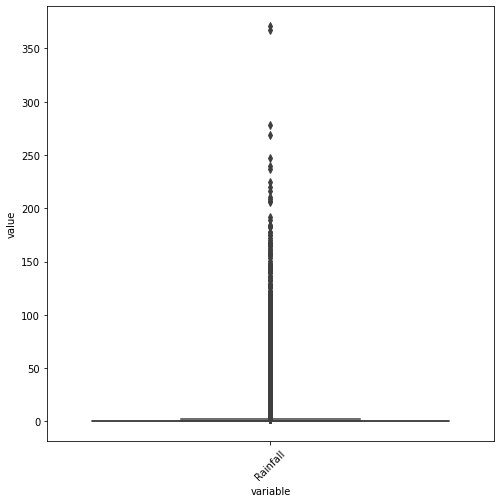

In [48]:
# Outlier - Uni-variate(one variable outlier analysis) using Box plot

df_rainfall = df_impute[['Rainfall']]

fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlabel("va=baseline")
sns.boxplot(x="variable", y="value", data=pd.melt(df_rainfall))
plt.xticks(rotation=45)
plt.show()

In [33]:
# Checking the maximum value of the Rainfall variable
df_impute[['Rainfall']].max()

Rainfall    371.0
dtype: float64

In the above boxplot analysis we see the `Rainfall` data is highly skewed and we can see there are apparent outliers. We notice most of the values (including mean, median) falls around `0`. Which is understandable considering it does't rain most of the days in Australia.

If we look at the extreme value for Rainfall alone, its `371 mm`. Based on the recorded weather history this is not nearly equal to be highest or an outlier. The Highest daily rainfall in 24 hours period is recorded to be 907mm in Australia.

So, we decided to treat this as a valid observation and not change it in any way.

##### Reference:  https://www.ga.gov.au/scientific-topics/national-location-information/dimensions/climatic-extremes

##### Outliers - Continuing with other variables

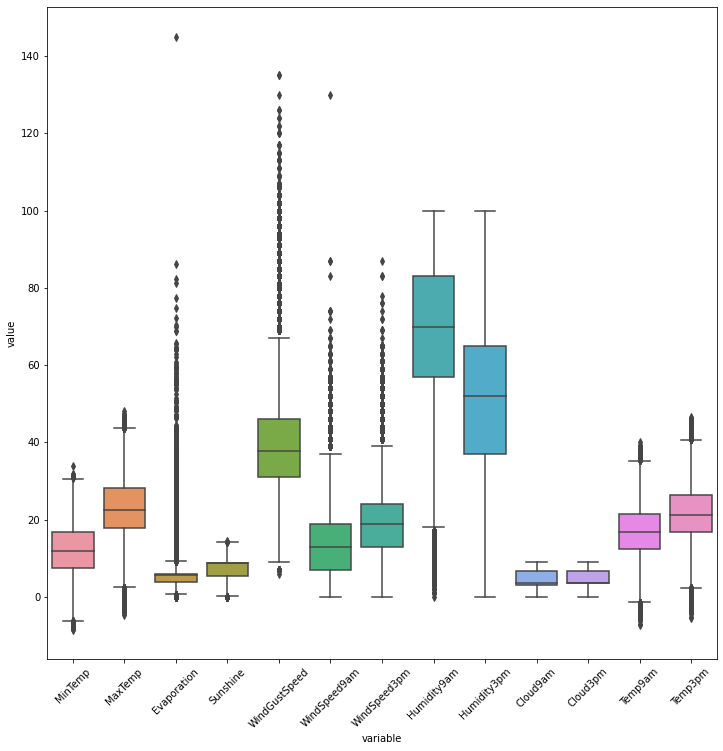

In [35]:
# Boxplot of subset of variables
df_num
df_boxplot = df_impute[['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm']]

fig, ax = plt.subplots(figsize=(12,12))
ax.set_xlabel("va=baseline")
sns.boxplot(x="variable", y="value", data=pd.melt(df_boxplot))
plt.xticks(rotation=45)
plt.show()

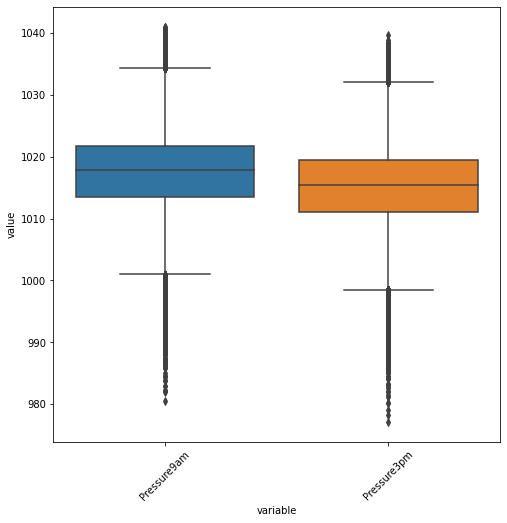

In [36]:
# Boxplot for Pressure at 9 am and 3 pm

df_pressure = df_impute[['Pressure9am', 'Pressure3pm']]


fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlabel("va=baseline")
sns.boxplot(x="variable", y="value", data=pd.melt(df_pressure))
plt.xticks(rotation=45)
plt.show()


In [44]:
# Maximum of each variable
df_impute.max()

Date             2017-06-25
Location            Woomera
MinTemp                33.9
MaxTemp                48.1
Rainfall              371.0
Evaporation           145.0
Sunshine               14.5
WindGustDir             WSW
WindGustSpeed         135.0
WindDir9am              WSW
WindDir3pm              WSW
WindSpeed9am          130.0
WindSpeed3pm           87.0
Humidity9am           100.0
Humidity3pm           100.0
Pressure9am          1041.0
Pressure3pm          1039.6
Cloud9am                9.0
Cloud3pm                9.0
Temp9am                40.2
Temp3pm                46.7
RainToday               Yes
RainTomorrow            Yes
dtype: object

Australia is a land of extremes with temperatures ranging from highs of 40°C in the central desert regions to below freezing in the higher regions of the country's southeast. Sometimes these extremes can be experienced on a single day.

##### Reference: https://www.ga.gov.au/scientific-topics/national-location-information/dimensions/climatic-extremes

Similarly, if we look at the barometeric pressure, the highest barometric pressure ever recorded was 1083.8mb. While the lowest non-tornadic atmospheric pressure ever measured was 870 hPa (0.858 atm; 25.69 inHg).

###### https://en.wikipedia.org/wiki/Atmospheric_pressure

###### https://www.guinnessworldrecords.com/world-records/highest-barometric-pressure-

Based on these evidences, we conclude that even though we have some extreme values in our dataset they are not entirely wrong or improbable. We decided that we will not delete or impute any of our outliers and continue our our analysis with the data as observed. 


## 4. Simple Statistics

In [ ]:
df_impute.describe().transpose()

In [ ]:
#Add State
state_df = pd.read_csv("loc.csv")
pd.merge(df_impute, state_df, on='Location', how='outer')



In [ ]:
print(df_impute)

## 5. Visualize Attributes

## 6. Explore Joint Attributes

#### Correlation Matrix: 

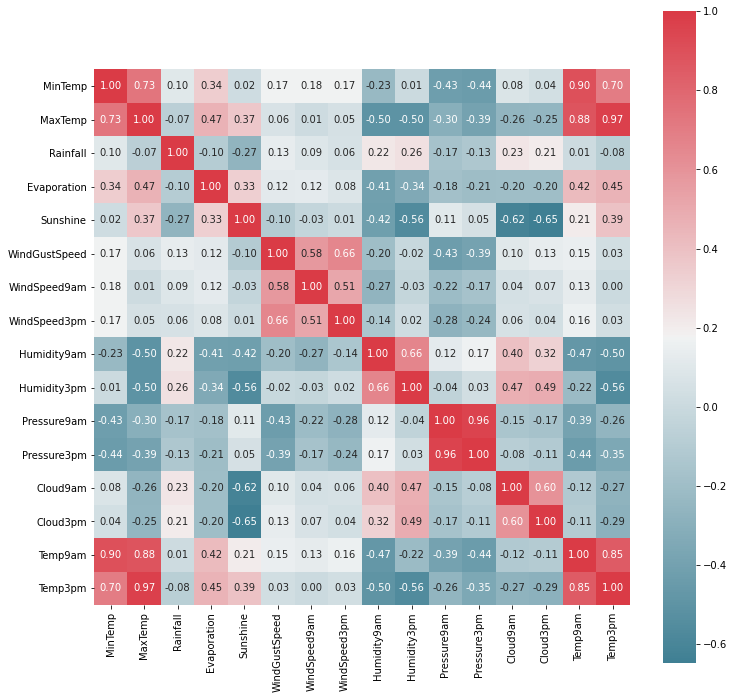

In [45]:
#HeatMap for plot on the correlation matrix using seaborn
plt.figure(figsize=(12,12))
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings
ax = sns.heatmap(df_impute.corr(), cmap=cmap, square=True, annot=True, fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

/Users/apurv/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


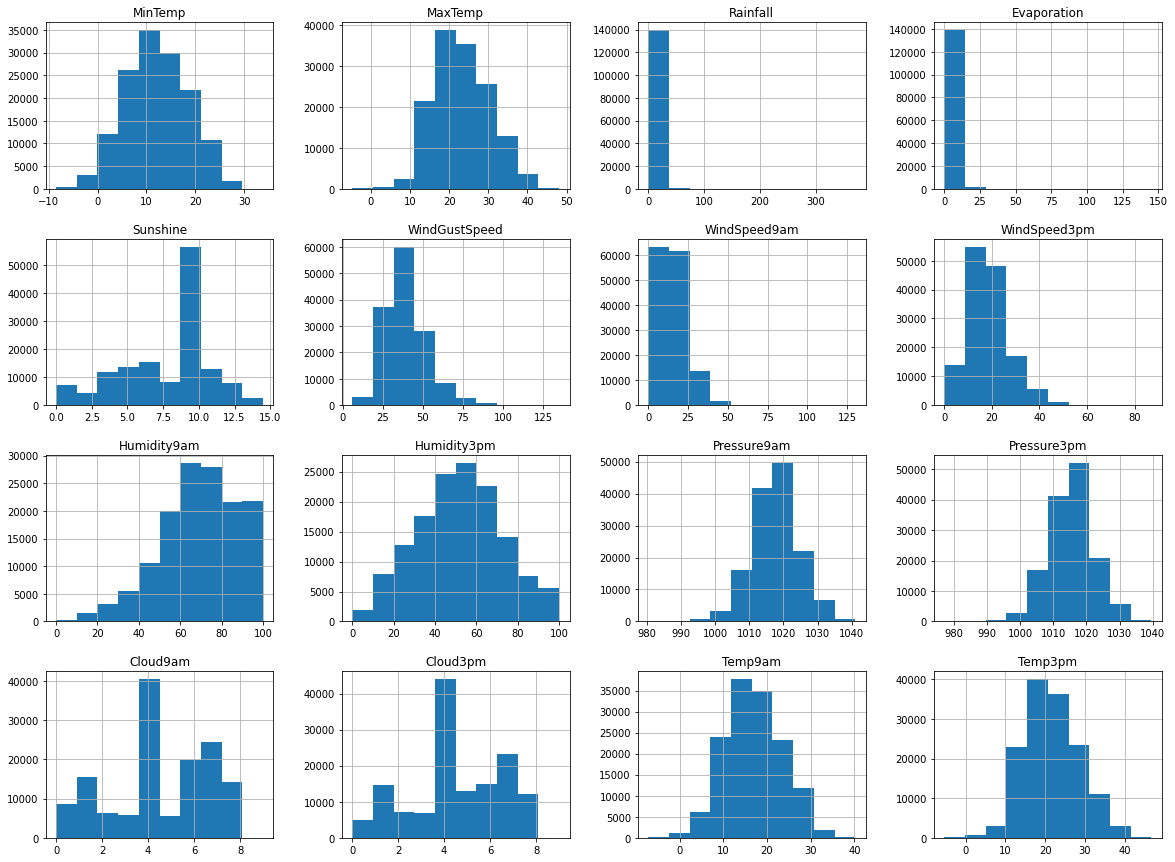

In [46]:
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
df_impute.hist(ax=ax)
plt.show()

#### Cross-Tabulation:

In [ ]:
# RainToday By State (first one) and RainTomorrow by State (second one)

Location_Windir_RainToday = pd.crosstab(df_impute['State'], df_impute['RainToday'])
Location_Windir_RainToday.div(Location_Windir_RainToday.sum(1),axis=0).plot.barh(stacked = True)

Location_Windir_Raintomorrow = pd.crosstab(df_impute['State'], df_impute['RainTomorrow'])
Location_Windir_Raintomorrow.div(Location_Windir_Raintomorrow.sum(1),axis=0).plot.barh(stacked = True)



The crosstab charts show that Queensland and Tasmania both have chance of having rainfall both current day and day after. Other states are significantly close. Northern Territory tends to have least rainfall (both RainToday and RainTomorrow).

In [ ]:
# Rainfall (mm) By State 
fig = plt.figure(figsize =(7, 4)) 

# Horizontal Bar Plot 
dtg = df_impute.groupby(by=df_impute.State)['Rainfall'].mean()


dtg.plot(kind = 'bar') 


groupby_single = df_impute.groupby(['State']).agg({'Rainfall': ['mean', 'min', 'max']})
groupby_single


Queensland has received the most amount of rainfall with mean amount of 4.02 mm. South Australia has received the lowest amount with mean value of 1.38 mm. Although we have noticed previously that Tasmania has second most raifall (close to Queensland) but it has not received a lot compare to some of the other states. New South Wales has received the most amount of daily rainfall and South Australia has received the least amount.

In [ ]:
#Rainfall By Year 
hg = df_impute.groupby(by=pd.DatetimeIndex(df_impute['Date']).year)['Rainfall'].mean()
hg.plot(kind='bar') 
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.title("Mean Rainfall (mm) By Year")

We notice that most rainfall occured during 2007 with mean amount around 3.5 mm. The lowest amount received during 2014 with mean amount of 1.8 mm. 

In [ ]:
#Rainfall By Wind Direction

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
df_impute.pivot(columns='WindGustDir', values='Rainfall').iplot(
        kind='box',
        yTitle='Rainfall(mm)',
        title='Rainfall By Wind Direction')
#Source: https://towardsdatascience.com/the-next-level-of-data-visualization-in-python-dd6e99039d5e

The above plot shows box plots for each wind direction. Rainfall occurs mostly when wind heads through West (371 mm) and West-SouthWest (367.8 mm) directions. Least amount of rainfall takes place when wind heads though North-Northwest (129.4) direction.

## 7.Explore Attributes and Class

In [ ]:
#Rainfall Vs Different Temperature Attributes

# Line plot for the effect of wind direction on rainfall 
state = ['Australian Capital Territory','New South Wales', 'Northern Territory', 'Queensland', 'South Australia', 
          'Tasmania', 'Victoria', 'Western Australia']

import plotly.graph_objs as go
fig = go.Figure()

fig.add_trace(go.Scatter(y=df_impute.groupby('MinTemp')['Rainfall'].mean(),
                         x=state,
                         name = 'Minimum Temperature',
                         line_width=5.0,
                         )
             )
fig.add_trace(go.Scatter(y=df_impute.groupby('MaxTemp')['Rainfall'].mean(),
                         x=state,
                         name = 'Maximum Temperature',
                         line_width=5.0,
                        )
             )

fig.update_layout(title='Rainfall vs Min/Max Temperature',
                  xaxis_title='Temperature [celsius]',
                  yaxis_title='Rainfall [mm]',
                  titlefont={'size': 28, 'family':'Serif'},
                  showlegend=True,
                  paper_bgcolor='lightgray',
                  plot_bgcolor='#999999',
                  width=750, height=500,
                 )
fig.show()

# Reference: https://www.kaggle.com/desalegngeb/plotly-guide-customize-for-better-visualizations

In the chart above, we notice New South Wales have the lowest minimum temperature (around 0 degree celsius) and maximum temperature (1.4 degree celsius). Queensland has the highest minimumum temperature (7.4 degree celsius) and maximum temperature (24.2 celsius). We can conclude that that New South Wales is the coldest region and Queensland is the hotest region. We also notice that Victoria has wide temperature range as it can get as hot (16 degree celsius) and as low as (1 degree celsius).

In [ ]:
#Rainfall Vs Other Continuous Attributes 

sns.pairplot(df_impute[['Rainfall','Evaporation', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
                       'Pressure9am', 'Pressure3pm']])

Above pairplot breaks down relationship between `Rainfall` attribute and other continuous variables. Overall, we notice all positive relationship between those continuous independant variables and `Rainfall`. For humidity, as the percentage grows the chances of rainfall increases. For pressures, for both morning and evening, most of the time rainfall occurs during 1000 hectopascals - 1200 hectopascals. Same trend goes for WindGustSpeed where rainfall takes place during windspeed around 50 kph - 70 kph.

In [ ]:
# Morning Cloud vs Rainfall
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(df_impute.Cloud9am, df_impute.Rainfall, s=10, hue = df_impute.RainTomorrow, ax=ax)
plt.title("Morning Cloud vs Rainfall", fontsize=20)
plt.tick_params(rotation=90)
plt.show()

# Evening Cloud vs Rainfall
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(df_impute.Cloud3pm, df_impute.Rainfall, s=10, hue = df_impute.RainTomorrow, ax=ax)
plt.title("Evening Cloud vs Rainfall", fontsize=20)
plt.tick_params(rotation=90)
plt.show()

Both chart shows that rainfall occurs after cloud takes up more than 6% of the sky for next day. The most amount of rainfall received at 8%. As expected, the locations receive less rain when sky is clear or cloud occupies less than 3%.

## 8.New Features

   ### Added State a new feature

In [ ]:
df_impute["Rainfall"].describe()

   ### Add rain amount as categorical (High, Medium, Low, None)

In [ ]:
def rain_classifier(row):
    if row["Rainfall"] > 100:
        return "Heavy"
    elif row["Rainfall"] > 50 and row["Rainfall"] < 100:
        return "Medium"
    elif row["Rainfall"] > 1 and row["Rainfall"] < 50:
        return "Low"
    else:
        return "None"

In [ ]:
df_impute["RainfallAmount"] = df.apply(rain_classifier, axis=1)

In [ ]:
df_impute["RainfallAmount"]

## 9. Exceptional Work

In [ ]:
df_impute_num = df.columns[df.dtypes == 'float64']
df_impute_cat=df.columns[df.dtypes == 'object']
print("Numeric Variables:", df_num)
print("Categorical Variables:", df_cat)

In [ ]:
X=df_impute[df_num]
y = df.RainTomorrow

In [ ]:
print('features shape:', X.shape) 
print('target shape:', y.shape )

In [ ]:
# PCA Code

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# standardizing the features
X = StandardScaler().fit_transform(X)

pca = PCA(n_components = 16)

principalComponents = pca.fit_transform(X)

principalDF = pd.DataFrame(data = principalComponents)

finalDF = pd.concat([principalDF, df[['RainTomorrow']]], axis =1)

plt.subplots(figsize=(6, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
print('Cumulative Explained variance of components:',sum(pca.explained_variance_ratio_[0:199]) )
print(pca)


variation = pd.DataFrame(pca.explained_variance_ratio_)
print("Variation explained by each component:",variation)
# Reference : https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [ ]:
#Read the Government data for State and Latitude/Longitude lookup to create a geography dataframe for Weather Australia
worldcities = pd.read_csv("worldcities.csv", header=[0], encoding = "ISO-8859-1", engine='python')
worldcities = worldcities[(worldcities.country == "Australia")]
worldcities.rename(columns={'city': 'Location', 'lat': 'Latitude', 'lng': 'Longitude', 'admin_name': 'State'}, inplace=True)
worldcities = worldcities.drop(['city_ascii','country','iso2','iso3','capital','population','id'],axis=1)
df_impute_temp = df_impute
df_geo = pd.merge(df_impute_temp, worldcities, how="left", on=["Location"])
df_geo.head()


# Reference for World Cities data : https://simplemaps.com/data/world-cities

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=df_geo['Longitude'], y=df_geo['Latitude'])
plt.show()

In [ ]:
#import pandas as pd
# pip install shapely
# pip install geopandas
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
aus = gpd.read_file("aust_cd66states.shp", SHAPE_RESTORE_SHX = 'YES')
geometry = [Point(xy) for xy in zip(df_geo['Longitude'], df_geo['Latitude'])]
gdf = GeoDataFrame(df_geo, geometry=geometry)
#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=aus.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

# Reference for Australia shape file: http://data.daff.gov.au/anrdl/metadata_files/pa_nsaasr9nnd_02211a04.xml

In [ ]:
from mpl_toolkits.basemap import Basemap #conda install basemap
#import matplotlib.pyplot as plt
#import numpy as np
#import pandas as pd
fig = plt.figure(figsize=(12,9))
m = Basemap(projection='mill',
           llcrnrlat = -90,
           urcrnrlat = 90,
           llcrnrlon = -180,
           urcrnrlon = 180,
           resolution = 'c')
m.drawcoastlines()
m.drawparallels(np.arange(-90,90,10),labels=[True,False,False,False])
m.drawmeridians(np.arange(-180,180,30),labels=[0,0,0,1])
sites_lat_y = df_geo['Latitude'].tolist()
sites_lon_x = df_geo['Longitude'].tolist()
colors = ['green', 'darkblue', 'yellow', 'red', 'blue', 'orange']
m.scatter(sites_lon_x,sites_lat_y,latlon=True, s=500, c=colors, marker='o', alpha=1, edgecolor='k', linewidth=1)
plt.title('Basemap tutorial', fontsize=20)
plt.show()

In [ ]:
import plotly.express as px

components = pca.fit_transform(X)
total_var = pca.explained_variance_ratio_.sum() * 100
n_components = 4

fig = px.scatter_matrix(
    components,
    color=hotel_nol.is_canceled,
    dimensions=range(n_components),
    title=f'Total Explained Variance: {total_var:.2f}%',
)
fig.show()